In [1]:
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [2]:
#Read The dataset

data = pd.read_csv("Mergerd_Dataset.csv")



In [3]:
# label_encoder object using

label_encoder = preprocessing.LabelEncoder()
data['day']= label_encoder.fit_transform(data['day']) 
data.head(406)

,day,lab_test,confirmed_case,death_case,first_dose,second_dose
0,0,434,9,2,0,0
1,1,367,18,1,0,0
2,2,468,35,3,0,0
3,3,679,41,5,0,0
4,4,981,54,3,0,0
...,...,...,...,...,...,...
401,401,16848,1514,38,0,0
402,402,14184,1230,33,10,97337
403,403,15296,1140,40,2,57630
404,404,13471,1290,31,0,0


In [4]:
data.shape

(626, 6)

In [5]:
data.describe()

,day,lab_test,confirmed_case,death_case,first_dose,second_dose
count,626.000000,626.000000,626.000000,626.000000,6.260000e+02,6.260000e+02
mean,312.500000,18033.835463,2526.009585,44.798722,1.097140e+05,7.309854e+04
std,180.854914,9357.619008,2936.765446,54.528270,3.617676e+05,2.869615e+05
min,0.000000,367.000000,9.000000,0.000000,0.000000e+00,0.000000e+00
25%,156.250000,12869.500000,657.750000,14.000000,0.000000e+00,0.000000e+00
50%,312.500000,15557.000000,1637.000000,30.000000,0.000000e+00,0.000000e+00
75%,468.750000,20982.750000,2953.500000,44.000000,9.829925e+04,1.226475e+04
max,625.000000,55284.000000,16230.000000,264.000000,6.625123e+06,5.444166e+06


In [6]:
# Spliting Data into 2 parts


x= data.drop('death_case', axis=1)
y= data['death_case']

print('Shape of X =', x.shape)
print('Shape of y =', y.shape)

Shape of X = (626, 5)
Shape of y = (626,)


In [7]:
# Data Train_test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
 
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (500, 5)
Shape of y_train =  (500,)
Shape of x_test =  (126, 5)
Shape of y_test =  (126,)


In [8]:
# Linear Regression Function Call

linear_r = LinearRegression()

In [9]:
# fitting the values:

linear_r.fit(x_train, y_train)

LinearRegression()

In [10]:
pred = linear_r.predict(x_test)
print(pred)
x_test.shape

[ 6.19701611e+01  8.56201026e+00  3.57121373e+01  7.52826280e+00
  4.10840121e+01  1.52925536e+01  3.50515135e+01  1.17655349e+02
  2.00101081e+01  2.61292346e+01  2.02103221e+01  8.06360224e+01
  3.97406258e+01  5.62375197e+01  1.36061386e+01  1.00088700e+02
  2.55586083e+01  5.89148222e+01  1.63188074e+01  1.75480118e+02
  2.41156901e+01  2.18294241e+01  6.06623260e+01  1.17947927e+02
  2.01095769e+01  2.15269401e+02  2.08577781e+01  3.76948867e+01
  2.14284828e+01  3.50076198e+01  2.32649396e+01  2.80241518e+01
  1.62305972e+01  2.00109724e+01  1.66126211e+00  2.17595161e+01
  1.72495661e+02  2.16867582e+01  2.39308006e+01  4.13048136e+01
  8.56284260e+00  1.83004474e+01  1.56208475e+02  7.61146504e+00
  2.58728419e+02  4.84748094e+01  9.31490196e+01  6.30389038e+01
  3.80578539e+01 -1.95389882e-01  2.67213331e+01  2.08088829e+01
  6.69406208e+01  3.25894366e+01  1.25597071e+02 -4.86601366e+00
  3.98814293e+01  3.60733901e+01  3.44985667e+01  3.01075566e+01
  1.19807351e+01  2.39579

(126, 5)

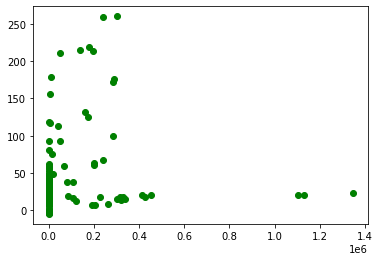

In [11]:
#After Getting First Dose Vaccine how death rate is decresing time to time

plt.scatter(x_test['first_dose'], pred, color="g")

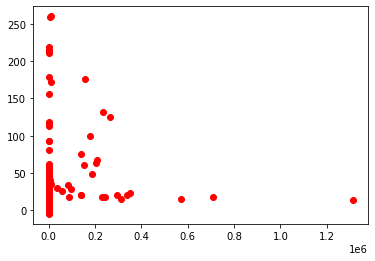

In [12]:
#After Getting Second Dose Vaccine how death rate is decresing time to time

plt.scatter(x_test['second_dose'], pred, color="r")

In [13]:
linear_r.predict([[537, 33327, 1562, 340551, 236723]])

array([26.69537852])

In [14]:
#finding the accuracy of the prediction

r2_score( y_test, pred)

0.8844583553021835

Text(0.5, 1.0, 'Data Description')

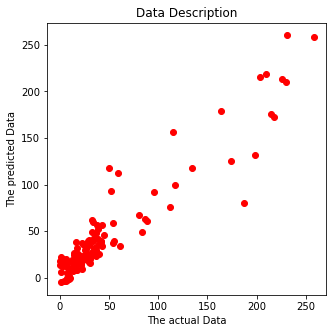

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, pred, label = 'Vitualization of Data', color ='r')
plt.xlabel('The actual Data')
plt.ylabel('The predicted Data')
plt.title('Data Description')

In [16]:
pred_y = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': pred, 'Differenece Between Two Data': y_test - pred})
pred_y [0:100]

,Actual Data,Predicted Data,Differenece Between Two Data
356,33,61.970161,-28.970161
299,15,8.562010,6.437990
425,30,35.712137,-5.712137
313,9,7.528263,1.471737
429,30,41.084012,-11.084012
52,21,15.292554,5.707446
235,39,35.051514,3.948486
455,134,117.655349,16.344651
547,18,20.010108,-2.010108
213,17,26.129235,-9.129235
